## Generate Data

2 classes
Shape of data is :  (200, 2)
Shape of targets :  (200, 2)


(-187.03867774534066, 54.416148380924824)

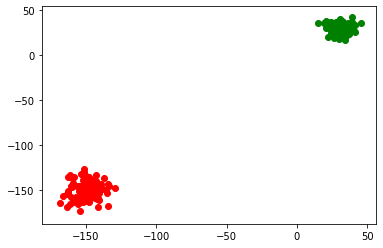

In [134]:
import random as rand
import numpy as np 
import matplotlib.pyplot as plt
size_of_each_class = 100
distributions = [[30,5],
                [-150, 10]]
num_classes = len(distributions)
print(num_classes, "classes")
data = []
targets = []
dimensions = 2
i = 0
#For each distribution, generate guassian data and add to our data
for mu, sigma in distributions:
    #Generate size_of_each_class number of normal distibution datapoints
    full_dimension = []
    for j in range(dimensions):
        gaussian_data = np.random.normal(mu, sigma, size_of_each_class)
        full_dimension.append(gaussian_data)
    full_dimension = np.asarray(full_dimension)
    if(len(data) != 0) :
        data = np.append(data, np.transpose(full_dimension), axis = 0)
    else :
        data = np.transpose(full_dimension)
    
    #Generate a target same size as each class size        
    for point in range(size_of_each_class):
        gen_target = np.zeros((num_classes))
        gen_target[i] += 1
        targets.append(gen_target)
    i += 1

# targets = np.asarray(targets).reshape(200,num_classes)
# print(targets)

print('Shape of data is : ', data.shape)
print('Shape of targets : ', np.asarray(targets).shape)

for i in range(len(data)):
    if(targets[i][0] < .5):
        plt.scatter(data[i][0], data[i][1], color='r')
    else:
        plt.scatter(data[i][0], data[i][1], color='g')
plt.ylim()

# Create Model 

In [252]:
import numpy as np
import random

class nn:
    def __init__(self, hiddenlayers = 0, neurons=5, activation='tanh'):
        self.hiddenlayers = hiddenlayers
        self.neurons = neurons
        self.nonlinear = activation
    def activation(self, x):
        if self.nonlinear == 'sigmoid':
            result = 1/ (1 + np.exp(-x))
        elif self.nonlinear == 'tanh':
            result = 2/(1+np.exp(-2*x)) - 1
        elif self.nonlinear == 'relu':
            result = []
            for i in range(len(x)):
                if x[i] < 0:
                    result.append(0)
                else:
                    result.append(x[i])
            result = np.asarray(result)
        return result
    def deactivate(self, x):
        if self.nonlinear == 'sigmoid':
            result = self.activation(x) * (1-self.activation(x))
        elif self.nonlinear == 'tanh':
            result = 1-(self.activation(x)**2)
        elif self.nonlinear == 'relu':
            result = []
            for i in range(len(x)):
                if x[i] < 0:
                    result.append(0)
                else:
                    result.append(1)
            result = np.asarray(result)
        return result
    def cost(self, y, response):
        return np.linalg.norm(y-response)**2
    def train(self, x, y, epochs = 5, alpha = 1, onlineupdate = False):
        self.onlineupdate = onlineupdate
        x = np.asarray(x)
        y = np.asarray(y)
        w = []
        length = len(x)
        
        if self.hiddenlayers == 0:
            w.append(np.random.rand(x.shape[1], y.shape[1]))
        else:
            w.append(np.random.rand(x.shape[1], self.neurons))
            for i in range(self.hiddenlayers-1):
                w.append(np.random.rand(self.neurons, self.neurons))
            w.append(np.random.rand(self.neurons, y.shape[1]))
        print('Neural Network structure')
        w = np.asarray(w)
        for i in range(len(w)):
            print("Layer",i,": ", w[i].shape)
        losses = []
        #Now its time to train

        for epoch in range(epochs):
            loss = 0
            totalgrad = 0
            xcopy = x
            ycopy = y
                
            for (datapoint, target) in zip(x, y):
                xs = []
                ys = []
                xs.append(datapoint)
                ys.append(datapoint)
                
                #Feed forward
                for i in range(len(w)):
                    weights = w[i]
                    z = weights.T @ ys[-1]
                    xs.append(z)
                    ys.append(self.activation(z))
                residvec = ys[-1] - target
                residual = self.cost(ys[-1], target)
                ys.pop(0) #don't need this
                loss += residual
                ##Now its time to back propogate
                gradients = []
                
                lastgrad = self.deactivate(xs[-1]) * residvec
                totalgrad += lastgrad/len(x)
                if self.onlineupdate == True:
                    gradients.append(lastgrad)
                    #Get all the gradients
                    for i in range(len(w)-1):

                        nextgrad = self.deactivate(xs[len(xs)-i-2]).reshape((self.deactivate(xs[len(xs)-i-2]).shape[0],1)) *  w[len(w)-i-1] @ gradients[i].reshape((gradients[i].shape[0],1)) 

                        gradients.append(nextgrad)
                    #Update weights
                    for i in range(len(w)):
                        weights = w[len(w)-1-i]
                        weights -= alpha * ys[len(ys)-2 - i].reshape((ys[len(ys)-2 - i].shape[0],1)) @ gradients[i].reshape((gradients[i].shape[0],1)).T
                        w[len(w)-1-i] = weights
                print("loss = " , loss)
                losses.append(loss)
            x = xcopy
            y = ycopy
        if self.onlineupdate == False:
            ##Now its time to back propogate
            gradients = []
            lastgrad = self.deactivate(xs[-1]) * residvec
            totalgrad += lastgrad/len(x)
            gradients.append(lastgrad)
            #Get all the gradients
            for i in range(len(w)-1):
                nextgrad = self.deactivate(xs[len(xs)-i-2]).reshape((self.deactivate(xs[len(xs)-i-2]).shape[0],1)) *  w[len(w)-i-1] @ gradients[i].reshape((gradients[i].shape[0],1)) 
                gradients.append(nextgrad)
            #Update weights
            for i in range(len(w)):
                weights = w[len(w)-1-i]
                weights -= alpha * ys[len(ys)-2 - i].reshape((ys[len(ys)-2 - i].shape[0],1)) @ gradients[i].reshape((gradients[i].shape[0],1)).T
                w[len(w)-1-i] = weights
        self.w = w
        print(loss)
        return losses;
    def predict(self, data):
        results = []
        for point in data:
            xs = []
            ys = []
            xs.append(point)
            ys.append(point)

            #Feed forward
            for i in range(len(self.w)):
                weights = self.w[i]
                z = weights.T @ ys[-1]
                xs.append(z)
                ys.append(self.activation(z))
            results.append(ys[-1])
        return results

## Train

In [253]:
nn = nn(activation='sigmoid')
data = data/np.max(data)
losses = nn.train(data, targets, epochs=1000, onlineupdate=False)
x = np.asarray([0,1])
active = nn.activation(x)
deactive = nn.deactivate(x)
print("Active = ", active, "Deactive, ", deactive)

Neural Network structure
Layer 0 :  (2, 2)
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.46978012624139
loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163537006954
loss =  19.09945580040375
loss =  19.770188312327576
loss =  20.420223652231456
loss =  21.095917897259213
loss =  21.761450495132717
loss =  22.427244527689087
loss =  23.093563643545345
loss =  23.726861900852914
lo

loss =  24.403879385335923
loss =  25.0617435253253
loss =  25.712992212719445
loss =  26.415875791146497
loss =  27.111596771108832
loss =  27.776101644121745
loss =  28.45153985529118
loss =  29.096682058350325
loss =  29.7023573817518
loss =  30.34785702240193
loss =  31.06669751578031
loss =  31.701096891482035
loss =  32.33494996177638
loss =  32.94304496125599
loss =  33.59344646164122
loss =  34.25493245611202
loss =  34.91404679495893
loss =  35.606438939961386
loss =  36.245854568550264
loss =  36.880731992377996
loss =  37.534798848093196
loss =  38.18122330663397
loss =  38.832967992484164
loss =  39.49401300595267
loss =  40.135370873149874
loss =  40.78817932177298
loss =  41.4489966727056
loss =  42.1348884292261
loss =  42.798987368641775
loss =  43.43746002985052
loss =  44.100373652782224
loss =  44.74269103643463
loss =  45.389411639782864
loss =  46.00948605662648
loss =  46.66788153565004
loss =  47.29686353666539
loss =  47.99209105374224
loss =  48.690437420604724

loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704

loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22

loss =  57.41008977138315
loss =  58.092643782832795
loss =  58.73751483707485
loss =  59.428010972631746
loss =  60.1007597703791
loss =  60.788047731433316
loss =  61.472473589294026
loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.7

loss =  23.726861900852914
loss =  24.403879385335923
loss =  25.0617435253253
loss =  25.712992212719445
loss =  26.415875791146497
loss =  27.111596771108832
loss =  27.776101644121745
loss =  28.45153985529118
loss =  29.096682058350325
loss =  29.7023573817518
loss =  30.34785702240193
loss =  31.06669751578031
loss =  31.701096891482035
loss =  32.33494996177638
loss =  32.94304496125599
loss =  33.59344646164122
loss =  34.25493245611202
loss =  34.91404679495893
loss =  35.606438939961386
loss =  36.245854568550264
loss =  36.880731992377996
loss =  37.534798848093196
loss =  38.18122330663397
loss =  38.832967992484164
loss =  39.49401300595267
loss =  40.135370873149874
loss =  40.78817932177298
loss =  41.4489966727056
loss =  42.1348884292261
loss =  42.798987368641775
loss =  43.43746002985052
loss =  44.100373652782224
loss =  44.74269103643463
loss =  45.389411639782864
loss =  46.00948605662648
loss =  46.66788153565004
loss =  47.29686353666539
loss =  47.99209105374224

loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750

loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22

loss =  56.711724214123535
loss =  57.41008977138315
loss =  58.092643782832795
loss =  58.73751483707485
loss =  59.428010972631746
loss =  60.1007597703791
loss =  60.788047731433316
loss =  61.472473589294026
loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.

loss =  23.093563643545345
loss =  23.726861900852914
loss =  24.403879385335923
loss =  25.0617435253253
loss =  25.712992212719445
loss =  26.415875791146497
loss =  27.111596771108832
loss =  27.776101644121745
loss =  28.45153985529118
loss =  29.096682058350325
loss =  29.7023573817518
loss =  30.34785702240193
loss =  31.06669751578031
loss =  31.701096891482035
loss =  32.33494996177638
loss =  32.94304496125599
loss =  33.59344646164122
loss =  34.25493245611202
loss =  34.91404679495893
loss =  35.606438939961386
loss =  36.245854568550264
loss =  36.880731992377996
loss =  37.534798848093196
loss =  38.18122330663397
loss =  38.832967992484164
loss =  39.49401300595267
loss =  40.135370873149874
loss =  40.78817932177298
loss =  41.4489966727056
loss =  42.1348884292261
loss =  42.798987368641775
loss =  43.43746002985052
loss =  44.100373652782224
loss =  44.74269103643463
loss =  45.389411639782864
loss =  46.00948605662648
loss =  46.66788153565004
loss =  47.2968635366653

loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.5763984

loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.23

loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  11

loss =  22.427244527689087
loss =  23.093563643545345
loss =  23.726861900852914
loss =  24.403879385335923
loss =  25.0617435253253
loss =  25.712992212719445
loss =  26.415875791146497
loss =  27.111596771108832
loss =  27.776101644121745
loss =  28.45153985529118
loss =  29.096682058350325
loss =  29.7023573817518
loss =  30.34785702240193
loss =  31.06669751578031
loss =  31.701096891482035
loss =  32.33494996177638
loss =  32.94304496125599
loss =  33.59344646164122
loss =  34.25493245611202
loss =  34.91404679495893
loss =  35.606438939961386
loss =  36.245854568550264
loss =  36.880731992377996
loss =  37.534798848093196
loss =  38.18122330663397
loss =  38.832967992484164
loss =  39.49401300595267
loss =  40.135370873149874
loss =  40.78817932177298
loss =  41.4489966727056
loss =  42.1348884292261
loss =  42.798987368641775
loss =  43.43746002985052
loss =  44.100373652782224
loss =  44.74269103643463
loss =  45.389411639782864
loss =  46.00948605662648
loss =  46.667881535650

loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.46978012624139
loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163

loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.46978012624139
loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163537006954
loss =  19.099455

loss =  55.304801445001466
loss =  55.981467169314264
loss =  56.711724214123535
loss =  57.41008977138315
loss =  58.092643782832795
loss =  58.73751483707485
loss =  59.428010972631746
loss =  60.1007597703791
loss =  60.788047731433316
loss =  61.472473589294026
loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss = 

loss =  27.776101644121745
loss =  28.45153985529118
loss =  29.096682058350325
loss =  29.7023573817518
loss =  30.34785702240193
loss =  31.06669751578031
loss =  31.701096891482035
loss =  32.33494996177638
loss =  32.94304496125599
loss =  33.59344646164122
loss =  34.25493245611202
loss =  34.91404679495893
loss =  35.606438939961386
loss =  36.245854568550264
loss =  36.880731992377996
loss =  37.534798848093196
loss =  38.18122330663397
loss =  38.832967992484164
loss =  39.49401300595267
loss =  40.135370873149874
loss =  40.78817932177298
loss =  41.4489966727056
loss =  42.1348884292261
loss =  42.798987368641775
loss =  43.43746002985052
loss =  44.100373652782224
loss =  44.74269103643463
loss =  45.389411639782864
loss =  46.00948605662648
loss =  46.66788153565004
loss =  47.29686353666539
loss =  47.99209105374224
loss =  48.690437420604724
loss =  49.33262255284075
loss =  50.00856865491846
loss =  50.701260536027256
loss =  51.37998590353888
loss =  52.02600159818712
l

loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.46978012624139
loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163537006954
loss =  19.09945580040375
loss =  19.770188312327576
loss =  20.420223652231456
loss =  21.095917897259213
loss =  21.761450495132717
loss =  22.427244527689087
loss =  23.093563643545345
loss =  23.726861900852914
loss =  24.403879385335923
loss =  25.0617435253253
loss =  25.712992212719445
loss =  26.415875791146497
loss =  27.111596771108832
loss =  27.776101644121745
loss =  28.45153985529118
loss =  29.096682058350325
loss =  29.7023573817518
loss =  30.34785702240193
loss =  31.06669751578031
loss =  31.701096891482035
loss =  32.33494996177638
loss =  32.94304496125599
loss =  33.59344646164122
loss =  34.25493245611202
loss =  34.91404679495893
loss =  35.606438939961386
loss =  36.245854568550264
loss =  36.880731992377996
loss =  37.53479

loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.9

loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.5

loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.255

loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.9

loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.

loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.2700

loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822

loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss

loss =  58.092643782832795
loss =  58.73751483707485
loss =  59.428010972631746
loss =  60.1007597703791
loss =  60.788047731433316
loss =  61.472473589294026
loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.7

loss =  56.711724214123535
loss =  57.41008977138315
loss =  58.092643782832795
loss =  58.73751483707485
loss =  59.428010972631746
loss =  60.1007597703791
loss =  60.788047731433316
loss =  61.472473589294026
loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.

loss =  46.00948605662648
loss =  46.66788153565004
loss =  47.29686353666539
loss =  47.99209105374224
loss =  48.690437420604724
loss =  49.33262255284075
loss =  50.00856865491846
loss =  50.701260536027256
loss =  51.37998590353888
loss =  52.02600159818712
loss =  52.65220479478111
loss =  53.32442885787328
loss =  54.00171662929218
loss =  54.67153635116015
loss =  55.304801445001466
loss =  55.981467169314264
loss =  56.711724214123535
loss =  57.41008977138315
loss =  58.092643782832795
loss =  58.73751483707485
loss =  59.428010972631746
loss =  60.1007597703791
loss =  60.788047731433316
loss =  61.472473589294026
loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss

loss =  42.1348884292261
loss =  42.798987368641775
loss =  43.43746002985052
loss =  44.100373652782224
loss =  44.74269103643463
loss =  45.389411639782864
loss =  46.00948605662648
loss =  46.66788153565004
loss =  47.29686353666539
loss =  47.99209105374224
loss =  48.690437420604724
loss =  49.33262255284075
loss =  50.00856865491846
loss =  50.701260536027256
loss =  51.37998590353888
loss =  52.02600159818712
loss =  52.65220479478111
loss =  53.32442885787328
loss =  54.00171662929218
loss =  54.67153635116015
loss =  55.304801445001466
loss =  55.981467169314264
loss =  56.711724214123535
loss =  57.41008977138315
loss =  58.092643782832795
loss =  58.73751483707485
loss =  59.428010972631746
loss =  60.1007597703791
loss =  60.788047731433316
loss =  61.472473589294026
loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
lo

loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.469780

loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750

loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.

loss =  52.02600159818712
loss =  52.65220479478111
loss =  53.32442885787328
loss =  54.00171662929218
loss =  54.67153635116015
loss =  55.304801445001466
loss =  55.981467169314264
loss =  56.711724214123535
loss =  57.41008977138315
loss =  58.092643782832795
loss =  58.73751483707485
loss =  59.428010972631746
loss =  60.1007597703791
loss =  60.788047731433316
loss =  61.472473589294026
loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =

loss =  19.09945580040375
loss =  19.770188312327576
loss =  20.420223652231456
loss =  21.095917897259213
loss =  21.761450495132717
loss =  22.427244527689087
loss =  23.093563643545345
loss =  23.726861900852914
loss =  24.403879385335923
loss =  25.0617435253253
loss =  25.712992212719445
loss =  26.415875791146497
loss =  27.111596771108832
loss =  27.776101644121745
loss =  28.45153985529118
loss =  29.096682058350325
loss =  29.7023573817518
loss =  30.34785702240193
loss =  31.06669751578031
loss =  31.701096891482035
loss =  32.33494996177638
loss =  32.94304496125599
loss =  33.59344646164122
loss =  34.25493245611202
loss =  34.91404679495893
loss =  35.606438939961386
loss =  36.245854568550264
loss =  36.880731992377996
loss =  37.534798848093196
loss =  38.18122330663397
loss =  38.832967992484164
loss =  39.49401300595267
loss =  40.135370873149874
loss =  40.78817932177298
loss =  41.4489966727056
loss =  42.1348884292261
loss =  42.798987368641775
loss =  43.4374600298

loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.4911467

loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488

loss =  51.37998590353888
loss =  52.02600159818712
loss =  52.65220479478111
loss =  53.32442885787328
loss =  54.00171662929218
loss =  54.67153635116015
loss =  55.304801445001466
loss =  55.981467169314264
loss =  56.711724214123535
loss =  57.41008977138315
loss =  58.092643782832795
loss =  58.73751483707485
loss =  59.428010972631746
loss =  60.1007597703791
loss =  60.788047731433316
loss =  61.472473589294026
loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =

loss =  18.461163537006954
loss =  19.09945580040375
loss =  19.770188312327576
loss =  20.420223652231456
loss =  21.095917897259213
loss =  21.761450495132717
loss =  22.427244527689087
loss =  23.093563643545345
loss =  23.726861900852914
loss =  24.403879385335923
loss =  25.0617435253253
loss =  25.712992212719445
loss =  26.415875791146497
loss =  27.111596771108832
loss =  27.776101644121745
loss =  28.45153985529118
loss =  29.096682058350325
loss =  29.7023573817518
loss =  30.34785702240193
loss =  31.06669751578031
loss =  31.701096891482035
loss =  32.33494996177638
loss =  32.94304496125599
loss =  33.59344646164122
loss =  34.25493245611202
loss =  34.91404679495893
loss =  35.606438939961386
loss =  36.245854568550264
loss =  36.880731992377996
loss =  37.534798848093196
loss =  38.18122330663397
loss =  38.832967992484164
loss =  39.49401300595267
loss =  40.135370873149874
loss =  40.78817932177298
loss =  41.4489966727056
loss =  42.1348884292261
loss =  42.7989873686

loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.866727

loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.31996795

loss =  50.701260536027256
loss =  51.37998590353888
loss =  52.02600159818712
loss =  52.65220479478111
loss =  53.32442885787328
loss =  54.00171662929218
loss =  54.67153635116015
loss =  55.304801445001466
loss =  55.981467169314264
loss =  56.711724214123535
loss =  57.41008977138315
loss =  58.092643782832795
loss =  58.73751483707485
loss =  59.428010972631746
loss =  60.1007597703791
loss =  60.788047731433316
loss =  61.472473589294026
loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss 

loss =  34.25493245611202
loss =  34.91404679495893
loss =  35.606438939961386
loss =  36.245854568550264
loss =  36.880731992377996
loss =  37.534798848093196
loss =  38.18122330663397
loss =  38.832967992484164
loss =  39.49401300595267
loss =  40.135370873149874
loss =  40.78817932177298
loss =  41.4489966727056
loss =  42.1348884292261
loss =  42.798987368641775
loss =  43.43746002985052
loss =  44.100373652782224
loss =  44.74269103643463
loss =  45.389411639782864
loss =  46.00948605662648
loss =  46.66788153565004
loss =  47.29686353666539
loss =  47.99209105374224
loss =  48.690437420604724
loss =  49.33262255284075
loss =  50.00856865491846
loss =  50.701260536027256
loss =  51.37998590353888
loss =  52.02600159818712
loss =  52.65220479478111
loss =  53.32442885787328
loss =  54.00171662929218
loss =  54.67153635116015
loss =  55.304801445001466
loss =  55.981467169314264
loss =  56.711724214123535
loss =  57.41008977138315
loss =  58.092643782832795
loss =  58.73751483707485

loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.20334

loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.32779353

loss =  50.00856865491846
loss =  50.701260536027256
loss =  51.37998590353888
loss =  52.02600159818712
loss =  52.65220479478111
loss =  53.32442885787328
loss =  54.00171662929218
loss =  54.67153635116015
loss =  55.304801445001466
loss =  55.981467169314264
loss =  56.711724214123535
loss =  57.41008977138315
loss =  58.092643782832795
loss =  58.73751483707485
loss =  59.428010972631746
loss =  60.1007597703791
loss =  60.788047731433316
loss =  61.472473589294026
loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss 

loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163537006954
loss =  19.09945580040375
loss =  19.770188312327576
loss =  20.420223652231456
loss =  21.095917897259213
loss =  21.761450495132717
loss =  22.427244527689087
loss =  23.093563643545345
loss =  23.726861900852914
loss =  24.403879385335923
loss =  25.0617435253253
loss =  25.712992212719445
loss =  26.415875791146497
loss =  27.111596771108832
loss =  27.776101644121745
loss =  28.45153985529118
loss =  29.096682058350325
loss =  29.7023573817518
loss =  30.34785702240193
loss =  31.06669751578031
loss =  31.701096891482035
loss =  32.33494996177638
loss =  32.94304496125599
loss =  33.59344646164122
loss =  34.25493245611202
loss =  34.91404679495893
loss =  35.606438939961386
loss =  36.245854568550264
loss =  36.880731992377996
loss =  37.534798848093196
loss =  38.18122330663397
loss =  38.832967992484164
loss =  39.49401300595267
loss =  40.135370873149874
loss =  40.78817932177298
loss =  41.4489966

loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.5251

loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.33885183

loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.46978012624139
loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163537006954
loss =  19.099455

loss =  44.100373652782224
loss =  44.74269103643463
loss =  45.389411639782864
loss =  46.00948605662648
loss =  46.66788153565004
loss =  47.29686353666539
loss =  47.99209105374224
loss =  48.690437420604724
loss =  49.33262255284075
loss =  50.00856865491846
loss =  50.701260536027256
loss =  51.37998590353888
loss =  52.02600159818712
loss =  52.65220479478111
loss =  53.32442885787328
loss =  54.00171662929218
loss =  54.67153635116015
loss =  55.304801445001466
loss =  55.981467169314264
loss =  56.711724214123535
loss =  57.41008977138315
loss =  58.092643782832795
loss =  58.73751483707485
loss =  59.428010972631746
loss =  60.1007597703791
loss =  60.788047731433316
loss =  61.472473589294026
loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
lo

loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.46978012624139
loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163537006954
loss =  19.09945580040375
loss =  19.770188312327576
loss =  20.420223652231456
loss =  21.095917897259213
loss =  21.761450495132717
loss =  22.427244527689087
loss =  23.093563643545345
loss =  23.726861900852914
loss =  24.403879385335923
loss =  25.0617435253253
loss =  25.712992212719445
loss =  26.415875791146497
loss =  27.111596771108832
loss =  27.776101644121745
loss =  28.45153985529118
loss =  29.0966820

loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.31996795

loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161

loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.46978012624139
loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163537006954
loss =  19.09945580040375
loss =  19.770188312327576
loss =  20.420223652231456
loss =  21.095917897259213
loss =  21.761450495132717
loss =  22.427244527689087
loss =  23.0935636

loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.52

loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.

loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822

loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488

loss =  53.32442885787328
loss =  54.00171662929218
loss =  54.67153635116015
loss =  55.304801445001466
loss =  55.981467169314264
loss =  56.711724214123535
loss =  57.41008977138315
loss =  58.092643782832795
loss =  58.73751483707485
loss =  59.428010972631746
loss =  60.1007597703791
loss =  60.788047731433316
loss =  61.472473589294026
loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =

loss =  57.41008977138315
loss =  58.092643782832795
loss =  58.73751483707485
loss =  59.428010972631746
loss =  60.1007597703791
loss =  60.788047731433316
loss =  61.472473589294026
loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.7

loss =  34.25493245611202
loss =  34.91404679495893
loss =  35.606438939961386
loss =  36.245854568550264
loss =  36.880731992377996
loss =  37.534798848093196
loss =  38.18122330663397
loss =  38.832967992484164
loss =  39.49401300595267
loss =  40.135370873149874
loss =  40.78817932177298
loss =  41.4489966727056
loss =  42.1348884292261
loss =  42.798987368641775
loss =  43.43746002985052
loss =  44.100373652782224
loss =  44.74269103643463
loss =  45.389411639782864
loss =  46.00948605662648
loss =  46.66788153565004
loss =  47.29686353666539
loss =  47.99209105374224
loss =  48.690437420604724
loss =  49.33262255284075
loss =  50.00856865491846
loss =  50.701260536027256
loss =  51.37998590353888
loss =  52.02600159818712
loss =  52.65220479478111
loss =  53.32442885787328
loss =  54.00171662929218
loss =  54.67153635116015
loss =  55.304801445001466
loss =  55.981467169314264
loss =  56.711724214123535
loss =  57.41008977138315
loss =  58.092643782832795
loss =  58.73751483707485

loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163537006954
loss =  19.09945580040375
loss =  19.770188312327576
loss =  20.420223652231456
loss =  21.095917897259213
loss =  21.761450495132717
loss =  22.427244527689087
loss =  23.093563643545345
loss =  23.726861900852914
loss =  24.403879385335923
loss =  25.0617435253253
loss =  25.712992212719445
loss =  26.415875791146497
loss =  27.111596771108832
loss =  27.776101644121745
loss =  28.45153985529118
loss =  29.096682058350325
loss =  29.7023573817518
loss =  30.34785702240193
loss =  31.06669751578031
loss =  31.701096891482035
loss =  32.33494996177638
loss =  32.94304496125599
loss =  33.59344646164122
loss =  34.25493245611202
loss =  34.91404679495893
loss =  35.606438939961386
loss =  36.245854568550264
loss =  36.880731992377996
loss =  37.534798848093196
loss =  38.18122330663397
loss =  38.832967992484164
loss =  39.49401300595267
loss =  40.135370873149874
loss =  40.78817932177298
loss =  41.4489966

loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.8673709

loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488

loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.2

loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.3868515216705

loss =  46.66788153565004
loss =  47.29686353666539
loss =  47.99209105374224
loss =  48.690437420604724
loss =  49.33262255284075
loss =  50.00856865491846
loss =  50.701260536027256
loss =  51.37998590353888
loss =  52.02600159818712
loss =  52.65220479478111
loss =  53.32442885787328
loss =  54.00171662929218
loss =  54.67153635116015
loss =  55.304801445001466
loss =  55.981467169314264
loss =  56.711724214123535
loss =  57.41008977138315
loss =  58.092643782832795
loss =  58.73751483707485
loss =  59.428010972631746
loss =  60.1007597703791
loss =  60.788047731433316
loss =  61.472473589294026
loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss

loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.46978012624139
loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163537006954
loss =  19.09945580040375
loss =  19.770188312327576
loss =  20.420223652231456
loss =  21.095917897259213
loss =  21.761450495132717
loss =  22.427244527689087
loss =  23.093563643545345
loss =  23.726861900852914
loss =  24.403879385335923
loss =  25.0617435253253
loss =  25.712992212719445
loss =  26.415875791146497
loss =  27.111596771108832
loss =  27.776101644121745
loss =  28.45153985529118
loss =  29.096682058350325
loss =  29.7023573817518
loss =  30.34785702240193
loss =  31.06669751578031
loss =  31.701096891482035
loss =  32.33494996177638
loss =  32.94304496125599
loss =  33.59344646164122
loss =  34.25493245611202
loss =  34.91404679495893
loss =  35.606438939961386
loss =  36.245854568550264
loss =  36.880731992377996
loss =  37.53479

loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.5

loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457

loss =  46.00948605662648
loss =  46.66788153565004
loss =  47.29686353666539
loss =  47.99209105374224
loss =  48.690437420604724
loss =  49.33262255284075
loss =  50.00856865491846
loss =  50.701260536027256
loss =  51.37998590353888
loss =  52.02600159818712
loss =  52.65220479478111
loss =  53.32442885787328
loss =  54.00171662929218
loss =  54.67153635116015
loss =  55.304801445001466
loss =  55.981467169314264
loss =  56.711724214123535
loss =  57.41008977138315
loss =  58.092643782832795
loss =  58.73751483707485
loss =  59.428010972631746
loss =  60.1007597703791
loss =  60.788047731433316
loss =  61.472473589294026
loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss

loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.46978012624139
loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163537006954
loss =  19.09945580040375
loss =  19.770188312327576
loss =  20.420223652231456
loss =  21.095917897259213
loss =  21.761450495132717
loss =  22.427244527689087
loss =  23.093563643545345
loss =  23.726861900852914
loss =  24.403879385335923
loss =  25.0617435253253
loss =  25.712992212719445
loss =  26.415875791146497
loss =  27.111596771108832
loss =  27.776101644121745
loss =  28.45153985529118
loss =  29.096682058350325
loss =  29.7023573817518
loss =  30.34785702240193
loss =  31.06669751578031
loss =  31.701096891482035
loss =  32.33494996177638
loss =  32.94304496125599
loss =  33.59344646164122
loss =  34.25493245611202
loss =  34.91404679495893
loss =  35.606438939961386
loss =  36.245854568550264
loss =  36.880731

loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3

loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
l

loss =  57.41008977138315
loss =  58.092643782832795
loss =  58.73751483707485
loss =  59.428010972631746
loss =  60.1007597703791
loss =  60.788047731433316
loss =  61.472473589294026
loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.7

loss =  20.420223652231456
loss =  21.095917897259213
loss =  21.761450495132717
loss =  22.427244527689087
loss =  23.093563643545345
loss =  23.726861900852914
loss =  24.403879385335923
loss =  25.0617435253253
loss =  25.712992212719445
loss =  26.415875791146497
loss =  27.111596771108832
loss =  27.776101644121745
loss =  28.45153985529118
loss =  29.096682058350325
loss =  29.7023573817518
loss =  30.34785702240193
loss =  31.06669751578031
loss =  31.701096891482035
loss =  32.33494996177638
loss =  32.94304496125599
loss =  33.59344646164122
loss =  34.25493245611202
loss =  34.91404679495893
loss =  35.606438939961386
loss =  36.245854568550264
loss =  36.880731992377996
loss =  37.534798848093196
loss =  38.18122330663397
loss =  38.832967992484164
loss =  39.49401300595267
loss =  40.135370873149874
loss =  40.78817932177298
loss =  41.4489966727056
loss =  42.1348884292261
loss =  42.798987368641775
loss =  43.43746002985052
loss =  44.100373652782224
loss =  44.7426910364

loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.52

loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.29478

loss =  55.981467169314264
loss =  56.711724214123535
loss =  57.41008977138315
loss =  58.092643782832795
loss =  58.73751483707485
loss =  59.428010972631746
loss =  60.1007597703791
loss =  60.788047731433316
loss =  61.472473589294026
loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  

loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.9

loss =  42.798987368641775
loss =  43.43746002985052
loss =  44.100373652782224
loss =  44.74269103643463
loss =  45.389411639782864
loss =  46.00948605662648
loss =  46.66788153565004
loss =  47.29686353666539
loss =  47.99209105374224
loss =  48.690437420604724
loss =  49.33262255284075
loss =  50.00856865491846
loss =  50.701260536027256
loss =  51.37998590353888
loss =  52.02600159818712
loss =  52.65220479478111
loss =  53.32442885787328
loss =  54.00171662929218
loss =  54.67153635116015
loss =  55.304801445001466
loss =  55.981467169314264
loss =  56.711724214123535
loss =  57.41008977138315
loss =  58.092643782832795
loss =  58.73751483707485
loss =  59.428010972631746
loss =  60.1007597703791
loss =  60.788047731433316
loss =  61.472473589294026
loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
l

loss =  42.798987368641775
loss =  43.43746002985052
loss =  44.100373652782224
loss =  44.74269103643463
loss =  45.389411639782864
loss =  46.00948605662648
loss =  46.66788153565004
loss =  47.29686353666539
loss =  47.99209105374224
loss =  48.690437420604724
loss =  49.33262255284075
loss =  50.00856865491846
loss =  50.701260536027256
loss =  51.37998590353888
loss =  52.02600159818712
loss =  52.65220479478111
loss =  53.32442885787328
loss =  54.00171662929218
loss =  54.67153635116015
loss =  55.304801445001466
loss =  55.981467169314264
loss =  56.711724214123535
loss =  57.41008977138315
loss =  58.092643782832795
loss =  58.73751483707485
loss =  59.428010972631746
loss =  60.1007597703791
loss =  60.788047731433316
loss =  61.472473589294026
loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
l

loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163537006954
loss =  19.09945580040375
loss =  19.770188312327576
loss =  20.420223652231456
loss =  21.095917897259213
loss =  21.761450495132717
loss =  22.427244527689087
loss =  23.093563643545345
loss =  23.726861900852914
loss =  24.403879385335923
loss =  25.0617435253253
loss =  25.712992212719445
loss =  26.415875791146497
loss =  27.111596771108832
loss =  27.776101644121745
loss =  28.45153985529118
loss =  29.096682058350325
loss =  29.7023573817518
loss =  30.34785702240193
loss =  31.06669751578031
loss =  31.701096891482035
loss =  32.33494996177638
loss =  32.94304496125599
loss =  33.59344646164122
loss =  34.25493245611202
loss =  34.91404679495893
loss =  35.606438939961386
loss =  36.245854568550264
loss =  36.880731992377996
loss =  37.534798848093196
loss =  38.18122330663397
loss =  38.832967992484164
loss =  39.49401300595267
loss =  40.135370873149874
loss =  40.78817932177298
loss =  41.4489966

loss =  26.415875791146497
loss =  27.111596771108832
loss =  27.776101644121745
loss =  28.45153985529118
loss =  29.096682058350325
loss =  29.7023573817518
loss =  30.34785702240193
loss =  31.06669751578031
loss =  31.701096891482035
loss =  32.33494996177638
loss =  32.94304496125599
loss =  33.59344646164122
loss =  34.25493245611202
loss =  34.91404679495893
loss =  35.606438939961386
loss =  36.245854568550264
loss =  36.880731992377996
loss =  37.534798848093196
loss =  38.18122330663397
loss =  38.832967992484164
loss =  39.49401300595267
loss =  40.135370873149874
loss =  40.78817932177298
loss =  41.4489966727056
loss =  42.1348884292261
loss =  42.798987368641775
loss =  43.43746002985052
loss =  44.100373652782224
loss =  44.74269103643463
loss =  45.389411639782864
loss =  46.00948605662648
loss =  46.66788153565004
loss =  47.29686353666539
loss =  47.99209105374224
loss =  48.690437420604724
loss =  49.33262255284075
loss =  50.00856865491846
loss =  50.701260536027256

loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822

loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.

loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss

loss =  44.74269103643463
loss =  45.389411639782864
loss =  46.00948605662648
loss =  46.66788153565004
loss =  47.29686353666539
loss =  47.99209105374224
loss =  48.690437420604724
loss =  49.33262255284075
loss =  50.00856865491846
loss =  50.701260536027256
loss =  51.37998590353888
loss =  52.02600159818712
loss =  52.65220479478111
loss =  53.32442885787328
loss =  54.00171662929218
loss =  54.67153635116015
loss =  55.304801445001466
loss =  55.981467169314264
loss =  56.711724214123535
loss =  57.41008977138315
loss =  58.092643782832795
loss =  58.73751483707485
loss =  59.428010972631746
loss =  60.1007597703791
loss =  60.788047731433316
loss =  61.472473589294026
loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
los

loss =  46.66788153565004
loss =  47.29686353666539
loss =  47.99209105374224
loss =  48.690437420604724
loss =  49.33262255284075
loss =  50.00856865491846
loss =  50.701260536027256
loss =  51.37998590353888
loss =  52.02600159818712
loss =  52.65220479478111
loss =  53.32442885787328
loss =  54.00171662929218
loss =  54.67153635116015
loss =  55.304801445001466
loss =  55.981467169314264
loss =  56.711724214123535
loss =  57.41008977138315
loss =  58.092643782832795
loss =  58.73751483707485
loss =  59.428010972631746
loss =  60.1007597703791
loss =  60.788047731433316
loss =  61.472473589294026
loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss

loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.46978012624139
loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163537006954
loss =  19.09945580040375
loss =  19.770188312327576
loss =  20.420223652231456
loss =  21.095917897259213
loss =  21.761450495132717
loss =  22.427244527689087
loss =  23.093563643545345
loss =  23.726861900852914
loss =  24.403879385335923
loss =  25.0617435253253
loss =  25.712992212719445
loss =  26.415875791146497
loss =  27.111596771108832
loss =  27.776101644121745
loss =  28.45153985529118
loss =  29.096682058350325
loss =  29.7023573817518
loss =  30.34785702240193
loss =  31.06669751578031
loss =  31.701096891482035
loss =  32.33494996177638
loss =  32.94304496125599
loss =  33.5934464

loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.46978012624139
loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163537006954
loss =  19.09945580040375
loss =  19.770188312327576
loss =  20.420223652231456
loss =  21.095917897259213
loss =  21.761450495132717
loss =  22.427244527689087
loss =  23.093563643545345
loss =  23.726861900852914
loss =  24.403879385335923
loss =  25.0617435253253
loss =  25.712992212719445
loss =  26.415875791146497
loss =  27.111596771108832
loss =  27.776101644121745
loss =  28.45153985529118
loss =  29.096682058350325
loss =  29.7023573817518
loss =  30.34785702240193
loss =  31.06669751578031
loss =  31.701096891482035
loss =  32.33494996177638
loss =  32.94304496125599
loss =  33.59344646164122
loss =  34.25493245611202
loss =  34.91404679495893
loss =  35.606438939961386
loss =  36.2458545

loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704

loss =  31.06669751578031
loss =  31.701096891482035
loss =  32.33494996177638
loss =  32.94304496125599
loss =  33.59344646164122
loss =  34.25493245611202
loss =  34.91404679495893
loss =  35.606438939961386
loss =  36.245854568550264
loss =  36.880731992377996
loss =  37.534798848093196
loss =  38.18122330663397
loss =  38.832967992484164
loss =  39.49401300595267
loss =  40.135370873149874
loss =  40.78817932177298
loss =  41.4489966727056
loss =  42.1348884292261
loss =  42.798987368641775
loss =  43.43746002985052
loss =  44.100373652782224
loss =  44.74269103643463
loss =  45.389411639782864
loss =  46.00948605662648
loss =  46.66788153565004
loss =  47.29686353666539
loss =  47.99209105374224
loss =  48.690437420604724
loss =  49.33262255284075
loss =  50.00856865491846
loss =  50.701260536027256
loss =  51.37998590353888
loss =  52.02600159818712
loss =  52.65220479478111
loss =  53.32442885787328
loss =  54.00171662929218
loss =  54.67153635116015
loss =  55.304801445001466
l

loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.31996795

loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  1

loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss = 

loss =  41.4489966727056
loss =  42.1348884292261
loss =  42.798987368641775
loss =  43.43746002985052
loss =  44.100373652782224
loss =  44.74269103643463
loss =  45.389411639782864
loss =  46.00948605662648
loss =  46.66788153565004
loss =  47.29686353666539
loss =  47.99209105374224
loss =  48.690437420604724
loss =  49.33262255284075
loss =  50.00856865491846
loss =  50.701260536027256
loss =  51.37998590353888
loss =  52.02600159818712
loss =  52.65220479478111
loss =  53.32442885787328
loss =  54.00171662929218
loss =  54.67153635116015
loss =  55.304801445001466
loss =  55.981467169314264
loss =  56.711724214123535
loss =  57.41008977138315
loss =  58.092643782832795
loss =  58.73751483707485
loss =  59.428010972631746
loss =  60.1007597703791
loss =  60.788047731433316
loss =  61.472473589294026
loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
los

loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.46978012624139
loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163537006954
loss =  19.09945580040375
loss =  19.770188312327576
loss =  20.420223652231456
loss =  21.095917897259213
loss =  21.761450495132717
loss =  22.427244527689087
loss =  23.093563643545345
loss =  23.726861900852914
loss =  24.403879385335923
loss =  25.0617435253253
loss =  25.712992212719445
loss =  26.415875791146497
loss =  27.111596771108832
loss =  27.776101644121745
loss =  28.45153985529118
loss =  29.096682058350325
loss =  29.7023573817518
loss =  30.34785702240193
loss =  31.06669751578031
loss =  31.701096891482035
loss =  32.33494996177638
loss =  32.9430449

loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164

loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss = 

loss =  40.78817932177298
loss =  41.4489966727056
loss =  42.1348884292261
loss =  42.798987368641775
loss =  43.43746002985052
loss =  44.100373652782224
loss =  44.74269103643463
loss =  45.389411639782864
loss =  46.00948605662648
loss =  46.66788153565004
loss =  47.29686353666539
loss =  47.99209105374224
loss =  48.690437420604724
loss =  49.33262255284075
loss =  50.00856865491846
loss =  50.701260536027256
loss =  51.37998590353888
loss =  52.02600159818712
loss =  52.65220479478111
loss =  53.32442885787328
loss =  54.00171662929218
loss =  54.67153635116015
loss =  55.304801445001466
loss =  55.981467169314264
loss =  56.711724214123535
loss =  57.41008977138315
loss =  58.092643782832795
loss =  58.73751483707485
loss =  59.428010972631746
loss =  60.1007597703791
loss =  60.788047731433316
loss =  61.472473589294026
loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
los

loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.46978012624139
loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163537006954
loss =  19.09945580040375
loss =  19.770188312327576
loss =  20.420223652231456
loss =  21.095917897259213
loss =  21.761450495132717
loss =  22.427244527689087
loss =  23.093563643545345
loss =  23.726861900852914
loss =  24.403879385335923
loss =  25.0617435253253
loss =  25.712992212719445
loss =  26.415875791146497
loss =  27.111596771108832
loss =  27.776101644121745
loss =  28.45153985529118
loss =  29.096682058350325
loss =  29.7023573817518
loss =  30.34785702240193
loss =  31.06669751578031
loss =  31.701096891482035
loss =  32.334949

loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.

loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.46978012624139
loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163537006954
loss =  19.09945580040375
loss =  19.770188312327576
loss =  20.420223652231456
loss =  21.095917897259213
loss =  21.761450495132717
loss =  22.427244527689087
loss =  23.093563643545345
loss =  23.726861900852914
loss =  24.403879385335923
loss =  25.0617435253253
loss =  25.712992212719445
loss =  26.415875791146497
loss =  27.111596771108832
loss =  27.776101644121745
loss =  28.45153985529118
loss =  29.096682058350325
loss =  29.7023573817518
loss =  30.34785702240193
loss =  31.06669751578031
loss =  31.7010968

loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  1

loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.46978012624139
loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163537006954
loss =  19.09945580040375
loss =  19.770188312327576
loss =  20.420223652231456
loss =  21.095917897259213
loss =  21.761450495132717
loss =  22.427244527689087
loss =  23.093563643545345
loss =  23.726861900852914
loss =  24.403879385335923
loss =  25.0617435253253
loss =  25.712992212719445
loss =  26.415875791146497
loss =  27.111596771108832
loss =  27.776101644121745
loss =  28.45153985529118
loss =  29.096682058350325
loss =  29.7023573817518
loss =  30.34785702240193
loss =  31.06669751578031
loss =  31.7010968

loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.863611

loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.46978012624139
loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163537006954
loss =  19.09945580040375
loss =  19.770188312327576
loss =  20.4202236

loss =  54.00171662929218
loss =  54.67153635116015
loss =  55.304801445001466
loss =  55.981467169314264
loss =  56.711724214123535
loss =  57.41008977138315
loss =  58.092643782832795
loss =  58.73751483707485
loss =  59.428010972631746
loss =  60.1007597703791
loss =  60.788047731433316
loss =  61.472473589294026
loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss = 

loss =  53.32442885787328
loss =  54.00171662929218
loss =  54.67153635116015
loss =  55.304801445001466
loss =  55.981467169314264
loss =  56.711724214123535
loss =  57.41008977138315
loss =  58.092643782832795
loss =  58.73751483707485
loss =  59.428010972631746
loss =  60.1007597703791
loss =  60.788047731433316
loss =  61.472473589294026
loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =

loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.613

loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.9

loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  

loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  1

loss =  27.111596771108832
loss =  27.776101644121745
loss =  28.45153985529118
loss =  29.096682058350325
loss =  29.7023573817518
loss =  30.34785702240193
loss =  31.06669751578031
loss =  31.701096891482035
loss =  32.33494996177638
loss =  32.94304496125599
loss =  33.59344646164122
loss =  34.25493245611202
loss =  34.91404679495893
loss =  35.606438939961386
loss =  36.245854568550264
loss =  36.880731992377996
loss =  37.534798848093196
loss =  38.18122330663397
loss =  38.832967992484164
loss =  39.49401300595267
loss =  40.135370873149874
loss =  40.78817932177298
loss =  41.4489966727056
loss =  42.1348884292261
loss =  42.798987368641775
loss =  43.43746002985052
loss =  44.100373652782224
loss =  44.74269103643463
loss =  45.389411639782864
loss =  46.00948605662648
loss =  46.66788153565004
loss =  47.29686353666539
loss =  47.99209105374224
loss =  48.690437420604724
loss =  49.33262255284075
loss =  50.00856865491846
loss =  50.701260536027256
loss =  51.37998590353888


loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss = 

loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  1

loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  1

loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
l

loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733

loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.

loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.

loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.2

loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.35011462

loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss 

loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822

loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.46978012624139
loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163537006954
loss =  19.09945580040375
loss =  19.770188312327576
loss =  20.420223652231456
loss =  21.095917897259213
loss =  21.761450495132717
loss =  22.427244527689087
loss =  23.093563643545345
loss =  23.726861900852914
loss =  24.403879385335923
loss =  25.0617435253253
loss =  25.712992212719445
loss =  26.415875791146497
loss =  27.111596771108832
loss =  27.776101644121745
loss =  28.45153985529118
loss =  29.096682058350325
loss =  29.7023573817518
loss =  30.34785702240193
loss =  31.06669751578031
loss =  31.701096891482035
loss =  32.33494996177638
loss =  32.94304496125599
loss =  33.59344646164122
loss =  34.2549324

loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.

loss =  36.245854568550264
loss =  36.880731992377996
loss =  37.534798848093196
loss =  38.18122330663397
loss =  38.832967992484164
loss =  39.49401300595267
loss =  40.135370873149874
loss =  40.78817932177298
loss =  41.4489966727056
loss =  42.1348884292261
loss =  42.798987368641775
loss =  43.43746002985052
loss =  44.100373652782224
loss =  44.74269103643463
loss =  45.389411639782864
loss =  46.00948605662648
loss =  46.66788153565004
loss =  47.29686353666539
loss =  47.99209105374224
loss =  48.690437420604724
loss =  49.33262255284075
loss =  50.00856865491846
loss =  50.701260536027256
loss =  51.37998590353888
loss =  52.02600159818712
loss =  52.65220479478111
loss =  53.32442885787328
loss =  54.00171662929218
loss =  54.67153635116015
loss =  55.304801445001466
loss =  55.981467169314264
loss =  56.711724214123535
loss =  57.41008977138315
loss =  58.092643782832795
loss =  58.73751483707485
loss =  59.428010972631746
loss =  60.1007597703791
loss =  60.788047731433316

loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.46978012624139
loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163537006954
loss =  19.09945580040375
loss =  19.770188312327576
loss =  20.420223652231456
loss =  21.095917897259213
loss =  21.761450495132717
loss =  22.427244527689087
loss =  23.093563643545345
loss =  23.726861900852914
loss =  24.403879385335923
loss =  25.0617435253253
loss =  25.712992212719445
loss =  26.415875791146497
loss =  27.111596771108832
loss =  27.77610164

loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.0

loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.

loss =  35.606438939961386
loss =  36.245854568550264
loss =  36.880731992377996
loss =  37.534798848093196
loss =  38.18122330663397
loss =  38.832967992484164
loss =  39.49401300595267
loss =  40.135370873149874
loss =  40.78817932177298
loss =  41.4489966727056
loss =  42.1348884292261
loss =  42.798987368641775
loss =  43.43746002985052
loss =  44.100373652782224
loss =  44.74269103643463
loss =  45.389411639782864
loss =  46.00948605662648
loss =  46.66788153565004
loss =  47.29686353666539
loss =  47.99209105374224
loss =  48.690437420604724
loss =  49.33262255284075
loss =  50.00856865491846
loss =  50.701260536027256
loss =  51.37998590353888
loss =  52.02600159818712
loss =  52.65220479478111
loss =  53.32442885787328
loss =  54.00171662929218
loss =  54.67153635116015
loss =  55.304801445001466
loss =  55.981467169314264
loss =  56.711724214123535
loss =  57.41008977138315
loss =  58.092643782832795
loss =  58.73751483707485
loss =  59.428010972631746
loss =  60.1007597703791

loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.46978012624139
loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163537006954
loss =  19.09945580040375
loss =  19.770188312327576
loss =  20.420223652231456
loss =  21.095917897259213
loss =  21.761450495132717
loss =  22.427244527689087
loss =  23.093563643545345
loss =  23.726861900852914
loss =  24.403879385335923
loss =  25.0617435253253
loss =  25.712992212719445
loss =  26.415875791146497
loss =  27.11159677

loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.0

loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.2700

loss =  52.02600159818712
loss =  52.65220479478111
loss =  53.32442885787328
loss =  54.00171662929218
loss =  54.67153635116015
loss =  55.304801445001466
loss =  55.981467169314264
loss =  56.711724214123535
loss =  57.41008977138315
loss =  58.092643782832795
loss =  58.73751483707485
loss =  59.428010972631746
loss =  60.1007597703791
loss =  60.788047731433316
loss =  61.472473589294026
loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =

loss =  59.428010972631746
loss =  60.1007597703791
loss =  60.788047731433316
loss =  61.472473589294026
loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72

loss =  46.00948605662648
loss =  46.66788153565004
loss =  47.29686353666539
loss =  47.99209105374224
loss =  48.690437420604724
loss =  49.33262255284075
loss =  50.00856865491846
loss =  50.701260536027256
loss =  51.37998590353888
loss =  52.02600159818712
loss =  52.65220479478111
loss =  53.32442885787328
loss =  54.00171662929218
loss =  54.67153635116015
loss =  55.304801445001466
loss =  55.981467169314264
loss =  56.711724214123535
loss =  57.41008977138315
loss =  58.092643782832795
loss =  58.73751483707485
loss =  59.428010972631746
loss =  60.1007597703791
loss =  60.788047731433316
loss =  61.472473589294026
loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss

loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.0

loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.5

loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.

loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.0

loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153

loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.46978012624139
loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163537006954
loss =  19.09945580040375
loss =  19.770188312327576
loss =  20.420223652231456
loss =  21.095917897259213
loss =  21.761450495132717
loss =  22.427244527689087
loss =  23.093563643545345
loss =  23.7268619

loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.46978012624139
loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163537006954
loss =  19.09945580040375
loss =  19.770188312327576
loss =  20.420223652231456
loss =  21.095917897259213
loss =  21.761450495132717
loss =  22.427244527689087
loss =  23.0935636

loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.

loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.46978012624139
loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163537006954
loss =  19.09945580040375
loss =  19.770188312327576
loss =  20.420223652231456
loss =  21.095917897259213
loss =  21.761450495132717
loss =  22.427244527689087
loss =  23.093563643545345
loss =  23.726861900852914
loss =  24.4038793

loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.46978012624139
loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163537006954
loss =  19.09945580040375
loss =  19.770188312327576
loss =  20.420223652231456
loss =  21.0959178

loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.

loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161

loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.46978012624139
loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163537006954
loss =  19.09945580040375
loss =  19.770188312327576
loss =  20.420223652231456
loss =  21.095917897259213
loss =  21.761450495132717
loss =  22.427244527689087
loss =  23.0935636

loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.866727

loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.9

loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.

loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60

loss =  35.606438939961386
loss =  36.245854568550264
loss =  36.880731992377996
loss =  37.534798848093196
loss =  38.18122330663397
loss =  38.832967992484164
loss =  39.49401300595267
loss =  40.135370873149874
loss =  40.78817932177298
loss =  41.4489966727056
loss =  42.1348884292261
loss =  42.798987368641775
loss =  43.43746002985052
loss =  44.100373652782224
loss =  44.74269103643463
loss =  45.389411639782864
loss =  46.00948605662648
loss =  46.66788153565004
loss =  47.29686353666539
loss =  47.99209105374224
loss =  48.690437420604724
loss =  49.33262255284075
loss =  50.00856865491846
loss =  50.701260536027256
loss =  51.37998590353888
loss =  52.02600159818712
loss =  52.65220479478111
loss =  53.32442885787328
loss =  54.00171662929218
loss =  54.67153635116015
loss =  55.304801445001466
loss =  55.981467169314264
loss =  56.711724214123535
loss =  57.41008977138315
loss =  58.092643782832795
loss =  58.73751483707485
loss =  59.428010972631746
loss =  60.1007597703791

loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.20334

loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150

loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342

loss =  31.06669751578031
loss =  31.701096891482035
loss =  32.33494996177638
loss =  32.94304496125599
loss =  33.59344646164122
loss =  34.25493245611202
loss =  34.91404679495893
loss =  35.606438939961386
loss =  36.245854568550264
loss =  36.880731992377996
loss =  37.534798848093196
loss =  38.18122330663397
loss =  38.832967992484164
loss =  39.49401300595267
loss =  40.135370873149874
loss =  40.78817932177298
loss =  41.4489966727056
loss =  42.1348884292261
loss =  42.798987368641775
loss =  43.43746002985052
loss =  44.100373652782224
loss =  44.74269103643463
loss =  45.389411639782864
loss =  46.00948605662648
loss =  46.66788153565004
loss =  47.29686353666539
loss =  47.99209105374224
loss =  48.690437420604724
loss =  49.33262255284075
loss =  50.00856865491846
loss =  50.701260536027256
loss =  51.37998590353888
loss =  52.02600159818712
loss =  52.65220479478111
loss =  53.32442885787328
loss =  54.00171662929218
loss =  54.67153635116015
loss =  55.304801445001466
l

loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.46978012624139
loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163537006954
loss =  19.09945580040375
loss =  19.770188312327576
loss =  20.420223652231456
loss =  21.095917897259213
loss =  21.761450495132717
loss =  22.4272445

loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149

loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.

loss =  30.34785702240193
loss =  31.06669751578031
loss =  31.701096891482035
loss =  32.33494996177638
loss =  32.94304496125599
loss =  33.59344646164122
loss =  34.25493245611202
loss =  34.91404679495893
loss =  35.606438939961386
loss =  36.245854568550264
loss =  36.880731992377996
loss =  37.534798848093196
loss =  38.18122330663397
loss =  38.832967992484164
loss =  39.49401300595267
loss =  40.135370873149874
loss =  40.78817932177298
loss =  41.4489966727056
loss =  42.1348884292261
loss =  42.798987368641775
loss =  43.43746002985052
loss =  44.100373652782224
loss =  44.74269103643463
loss =  45.389411639782864
loss =  46.00948605662648
loss =  46.66788153565004
loss =  47.29686353666539
loss =  47.99209105374224
loss =  48.690437420604724
loss =  49.33262255284075
loss =  50.00856865491846
loss =  50.701260536027256
loss =  51.37998590353888
loss =  52.02600159818712
loss =  52.65220479478111
loss =  53.32442885787328
loss =  54.00171662929218
loss =  54.67153635116015
lo

loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.46978012624139
loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163537006954
loss =  19.09945580040375
loss =  19.770188312327576
loss =  20.420223652231456
loss =  21.095917897259213
loss =  21.7614504

loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.

loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733

loss =  29.7023573817518
loss =  30.34785702240193
loss =  31.06669751578031
loss =  31.701096891482035
loss =  32.33494996177638
loss =  32.94304496125599
loss =  33.59344646164122
loss =  34.25493245611202
loss =  34.91404679495893
loss =  35.606438939961386
loss =  36.245854568550264
loss =  36.880731992377996
loss =  37.534798848093196
loss =  38.18122330663397
loss =  38.832967992484164
loss =  39.49401300595267
loss =  40.135370873149874
loss =  40.78817932177298
loss =  41.4489966727056
loss =  42.1348884292261
loss =  42.798987368641775
loss =  43.43746002985052
loss =  44.100373652782224
loss =  44.74269103643463
loss =  45.389411639782864
loss =  46.00948605662648
loss =  46.66788153565004
loss =  47.29686353666539
loss =  47.99209105374224
loss =  48.690437420604724
loss =  49.33262255284075
loss =  50.00856865491846
loss =  50.701260536027256
loss =  51.37998590353888
loss =  52.02600159818712
loss =  52.65220479478111
loss =  53.32442885787328
loss =  54.00171662929218
los

loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.46978012624139
loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163537006954
loss =  19.09945580040375
loss =  19.770188312327576
loss =  20.420223652231456
loss =  21.0959178

loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.

loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.1

loss =  60.788047731433316
loss =  61.472473589294026
loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.698

loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150

loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.255

loss =  27.111596771108832
loss =  27.776101644121745
loss =  28.45153985529118
loss =  29.096682058350325
loss =  29.7023573817518
loss =  30.34785702240193
loss =  31.06669751578031
loss =  31.701096891482035
loss =  32.33494996177638
loss =  32.94304496125599
loss =  33.59344646164122
loss =  34.25493245611202
loss =  34.91404679495893
loss =  35.606438939961386
loss =  36.245854568550264
loss =  36.880731992377996
loss =  37.534798848093196
loss =  38.18122330663397
loss =  38.832967992484164
loss =  39.49401300595267
loss =  40.135370873149874
loss =  40.78817932177298
loss =  41.4489966727056
loss =  42.1348884292261
loss =  42.798987368641775
loss =  43.43746002985052
loss =  44.100373652782224
loss =  44.74269103643463
loss =  45.389411639782864
loss =  46.00948605662648
loss =  46.66788153565004
loss =  47.29686353666539
loss =  47.99209105374224
loss =  48.690437420604724
loss =  49.33262255284075
loss =  50.00856865491846
loss =  50.701260536027256
loss =  51.37998590353888


loss =  29.096682058350325
loss =  29.7023573817518
loss =  30.34785702240193
loss =  31.06669751578031
loss =  31.701096891482035
loss =  32.33494996177638
loss =  32.94304496125599
loss =  33.59344646164122
loss =  34.25493245611202
loss =  34.91404679495893
loss =  35.606438939961386
loss =  36.245854568550264
loss =  36.880731992377996
loss =  37.534798848093196
loss =  38.18122330663397
loss =  38.832967992484164
loss =  39.49401300595267
loss =  40.135370873149874
loss =  40.78817932177298
loss =  41.4489966727056
loss =  42.1348884292261
loss =  42.798987368641775
loss =  43.43746002985052
loss =  44.100373652782224
loss =  44.74269103643463
loss =  45.389411639782864
loss =  46.00948605662648
loss =  46.66788153565004
loss =  47.29686353666539
loss =  47.99209105374224
loss =  48.690437420604724
loss =  49.33262255284075
loss =  50.00856865491846
loss =  50.701260536027256
loss =  51.37998590353888
loss =  52.02600159818712
loss =  52.65220479478111
loss =  53.32442885787328
lo

loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.46978012624139
loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163537006954
loss =  19.09945580040375
loss =  19.770188312327576
loss =  20.420223652231456
loss =  21.095917897259213
loss =  21.761450495132717
loss =  22.427244527689087
loss =  23.093563643545345
loss =  23.726861900852914
loss =  24.403879385335923
loss =  25.0617435253253
loss =  25.712992212719445
loss =  26.415875791146497
loss =  27.111596771108832
loss =  27.776101644121745
loss =  28.45153985529118
loss =  29.096682058350325
loss =  29.7023573817518
loss =  30.34785702240193
loss =  31.06669751578031
loss =  31.701096891482035
loss =  32.33494996177638
loss =  32.94304496125599
loss =  33.5934464

loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.46978012624139
loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163537006954
loss =  19.09945580040375
loss =  19.7701883

loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.46978012624139
loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163537006954
loss =  19.09945580040375
loss =  19.770188312327576
loss =  20.420223652231456
loss =  21.0959178

loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.

loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.46978012624139
loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163537006954
loss =  19.099455

loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164

loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.262

loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =

loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.46978012624139
loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163537006954
loss =  19.09945580040375
loss =  19.770188312327576
loss =  20.420223652231456
loss =  21.095917897259213
loss =  21.761450495132717
loss =  22.427244527689087
loss =  23.093563643545345
loss =  23.726861900852914
loss =  24.403879385335923
loss =  25.0617435253253
loss =  25.712992212719445
loss =  26.415875791146497
loss =  27.111596771108832
loss =  27.776101644121745
loss =  28.45153985529118
loss =  29.096682058350325
loss =  29.702357

loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.46978012624139
loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163

loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.1

loss =  59.428010972631746
loss =  60.1007597703791
loss =  60.788047731433316
loss =  61.472473589294026
loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72

loss =  26.415875791146497
loss =  27.111596771108832
loss =  27.776101644121745
loss =  28.45153985529118
loss =  29.096682058350325
loss =  29.7023573817518
loss =  30.34785702240193
loss =  31.06669751578031
loss =  31.701096891482035
loss =  32.33494996177638
loss =  32.94304496125599
loss =  33.59344646164122
loss =  34.25493245611202
loss =  34.91404679495893
loss =  35.606438939961386
loss =  36.245854568550264
loss =  36.880731992377996
loss =  37.534798848093196
loss =  38.18122330663397
loss =  38.832967992484164
loss =  39.49401300595267
loss =  40.135370873149874
loss =  40.78817932177298
loss =  41.4489966727056
loss =  42.1348884292261
loss =  42.798987368641775
loss =  43.43746002985052
loss =  44.100373652782224
loss =  44.74269103643463
loss =  45.389411639782864
loss =  46.00948605662648
loss =  46.66788153565004
loss =  47.29686353666539
loss =  47.99209105374224
loss =  48.690437420604724
loss =  49.33262255284075
loss =  50.00856865491846
loss =  50.701260536027256

loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.46978012624139
loss =  17.125554962143546
loss =  17.815655

loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.1

loss =  58.73751483707485
loss =  59.428010972631746
loss =  60.1007597703791
loss =  60.788047731433316
loss =  61.472473589294026
loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73

loss =  25.712992212719445
loss =  26.415875791146497
loss =  27.111596771108832
loss =  27.776101644121745
loss =  28.45153985529118
loss =  29.096682058350325
loss =  29.7023573817518
loss =  30.34785702240193
loss =  31.06669751578031
loss =  31.701096891482035
loss =  32.33494996177638
loss =  32.94304496125599
loss =  33.59344646164122
loss =  34.25493245611202
loss =  34.91404679495893
loss =  35.606438939961386
loss =  36.245854568550264
loss =  36.880731992377996
loss =  37.534798848093196
loss =  38.18122330663397
loss =  38.832967992484164
loss =  39.49401300595267
loss =  40.135370873149874
loss =  40.78817932177298
loss =  41.4489966727056
loss =  42.1348884292261
loss =  42.798987368641775
loss =  43.43746002985052
loss =  44.100373652782224
loss =  44.74269103643463
loss =  45.389411639782864
loss =  46.00948605662648
loss =  46.66788153565004
loss =  47.29686353666539
loss =  47.99209105374224
loss =  48.690437420604724
loss =  49.33262255284075
loss =  50.00856865491846

loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.46978012624139
loss =  17.125554

loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.2

loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427

loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  1

loss =  57.41008977138315
loss =  58.092643782832795
loss =  58.73751483707485
loss =  59.428010972631746
loss =  60.1007597703791
loss =  60.788047731433316
loss =  61.472473589294026
loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.7

loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3

loss =  57.41008977138315
loss =  58.092643782832795
loss =  58.73751483707485
loss =  59.428010972631746
loss =  60.1007597703791
loss =  60.788047731433316
loss =  61.472473589294026
loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.7

loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.

loss =  37.534798848093196
loss =  38.18122330663397
loss =  38.832967992484164
loss =  39.49401300595267
loss =  40.135370873149874
loss =  40.78817932177298
loss =  41.4489966727056
loss =  42.1348884292261
loss =  42.798987368641775
loss =  43.43746002985052
loss =  44.100373652782224
loss =  44.74269103643463
loss =  45.389411639782864
loss =  46.00948605662648
loss =  46.66788153565004
loss =  47.29686353666539
loss =  47.99209105374224
loss =  48.690437420604724
loss =  49.33262255284075
loss =  50.00856865491846
loss =  50.701260536027256
loss =  51.37998590353888
loss =  52.02600159818712
loss =  52.65220479478111
loss =  53.32442885787328
loss =  54.00171662929218
loss =  54.67153635116015
loss =  55.304801445001466
loss =  55.981467169314264
loss =  56.711724214123535
loss =  57.41008977138315
loss =  58.092643782832795
loss =  58.73751483707485
loss =  59.428010972631746
loss =  60.1007597703791
loss =  60.788047731433316
loss =  61.472473589294026
loss =  62.10826102361445


loss =  59.428010972631746
loss =  60.1007597703791
loss =  60.788047731433316
loss =  61.472473589294026
loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72

loss =  20.420223652231456
loss =  21.095917897259213
loss =  21.761450495132717
loss =  22.427244527689087
loss =  23.093563643545345
loss =  23.726861900852914
loss =  24.403879385335923
loss =  25.0617435253253
loss =  25.712992212719445
loss =  26.415875791146497
loss =  27.111596771108832
loss =  27.776101644121745
loss =  28.45153985529118
loss =  29.096682058350325
loss =  29.7023573817518
loss =  30.34785702240193
loss =  31.06669751578031
loss =  31.701096891482035
loss =  32.33494996177638
loss =  32.94304496125599
loss =  33.59344646164122
loss =  34.25493245611202
loss =  34.91404679495893
loss =  35.606438939961386
loss =  36.245854568550264
loss =  36.880731992377996
loss =  37.534798848093196
loss =  38.18122330663397
loss =  38.832967992484164
loss =  39.49401300595267
loss =  40.135370873149874
loss =  40.78817932177298
loss =  41.4489966727056
loss =  42.1348884292261
loss =  42.798987368641775
loss =  43.43746002985052
loss =  44.100373652782224
loss =  44.7426910364

loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.863611

loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687

loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.5763984

loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.46978012624139
loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163537006954
loss =  19.09945580040375
loss =  19.770188312327576
loss =  20.420223652231456
loss =  21.095917897259213
loss =  21.761450495132717
loss =  22.427244527689087
loss =  23.093563643545345
loss =  23.726861900852914
loss =  24.403879385335923
loss =  25.0617435253253
loss =  25.712992212719445
loss =  26.415875791146497
loss =  27.111596771108832
loss =  27.776101644121745
loss =  28.45153985

loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.46978012624139
loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163537006954
loss =  19.09945580040375
loss =  19.770188312327576
loss =  20.420223652231456
loss =  21.095917897259213
loss =  21.761450495132717
loss =  22.427244527689087
loss =  23.093563643545345
loss =  23.726861900852914
loss =  24.403879385335923
loss =  25.0617435253253
loss =  25.712992212719445
loss =  26.415875791146497
loss =  27.111596771108832
loss =  27.77610164

loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.46978012624139
loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163537006954
loss =  19.09945580040375
loss =  19.770188312327576
loss =  20.4202236

loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.46978012624139
loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163537006954
loss =  19.09945580040375
loss =  19.770188312327576
loss =  20.420223652231456
loss =  21.095917897259213
loss =  21.761450495132717
loss =  22.427244527689087
loss =  23.093563643545345
loss =  23.726861900852914
loss =  24.403879385335923
loss =  25.0617435253253
loss =  25.712992212719445
loss =  26.415875791146497
loss =  27.111596771108832
loss =  27.776101644121745
loss =  28.45153985529118
loss =  29.096682058350325
loss =  29.7023573817518
loss =  30.34785702240193
loss =  31.06669751578031
loss =  31.701096891482035
loss =  32.33494996177638
loss =  32.94304496125599
loss =  33.59344646164122
loss =  34.25493245611202
loss =  34.91404679495893
loss =  35.606438939961386
loss =  36.2458545

loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.46978012624139
loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163537006954
loss =  19.09945580040375
loss =  19.770188312327576
loss =  20.420223652231456
loss =  21.095917897259213
loss =  21.761450495132717
loss =  22.427244527689087
loss =  23.093563643545345
loss =  23.726861900852914
loss =  24.403879385335923
loss =  25.0617435253253
loss =  25.712992212719445
loss =  26.415875791146497
loss =  27.111596771108832
loss =  27.776101644121745
loss =  28.45153985529118
loss =  29.096682058350325
loss =  29.7023573817518
loss =  30.34785702240193
loss =  31.06669751578031
loss =  31.7010968

loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
lo

loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.186925467165663
loss =  13.867370983991824
loss =  14.576398492039685
loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.46978012624139
loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163537006954
loss =  19.09945580040375
loss =  19.770188312327576
loss =  20.420223652231456
loss =  21.095917897259213
loss =  21.761450495132717
loss =  22.427244527689087
loss =  23.0935636

loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.5

loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.29478

loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.

loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.54954368179311
loss =  13.18692546

loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.2700

loss =  54.00171662929218
loss =  54.67153635116015
loss =  55.304801445001466
loss =  55.981467169314264
loss =  56.711724214123535
loss =  57.41008977138315
loss =  58.092643782832795
loss =  58.73751483707485
loss =  59.428010972631746
loss =  60.1007597703791
loss =  60.788047731433316
loss =  61.472473589294026
loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss = 

loss =  21.095917897259213
loss =  21.761450495132717
loss =  22.427244527689087
loss =  23.093563643545345
loss =  23.726861900852914
loss =  24.403879385335923
loss =  25.0617435253253
loss =  25.712992212719445
loss =  26.415875791146497
loss =  27.111596771108832
loss =  27.776101644121745
loss =  28.45153985529118
loss =  29.096682058350325
loss =  29.7023573817518
loss =  30.34785702240193
loss =  31.06669751578031
loss =  31.701096891482035
loss =  32.33494996177638
loss =  32.94304496125599
loss =  33.59344646164122
loss =  34.25493245611202
loss =  34.91404679495893
loss =  35.606438939961386
loss =  36.245854568550264
loss =  36.880731992377996
loss =  37.534798848093196
loss =  38.18122330663397
loss =  38.832967992484164
loss =  39.49401300595267
loss =  40.135370873149874
loss =  40.78817932177298
loss =  41.4489966727056
loss =  42.1348884292261
loss =  42.798987368641775
loss =  43.43746002985052
loss =  44.100373652782224
loss =  44.74269103643463
loss =  45.38941163978

loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.86361120279074
loss =  12.5495436

loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037

loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.2700

loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.9

loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.173424888592574
loss =  11.863611

loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.29478

loss =  52.65220479478111
loss =  53.32442885787328
loss =  54.00171662929218
loss =  54.67153635116015
loss =  55.304801445001466
loss =  55.981467169314264
loss =  56.711724214123535
loss =  57.41008977138315
loss =  58.092643782832795
loss =  58.73751483707485
loss =  59.428010972631746
loss =  60.1007597703791
loss =  60.788047731433316
loss =  61.472473589294026
loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =

loss =  19.770188312327576
loss =  20.420223652231456
loss =  21.095917897259213
loss =  21.761450495132717
loss =  22.427244527689087
loss =  23.093563643545345
loss =  23.726861900852914
loss =  24.403879385335923
loss =  25.0617435253253
loss =  25.712992212719445
loss =  26.415875791146497
loss =  27.111596771108832
loss =  27.776101644121745
loss =  28.45153985529118
loss =  29.096682058350325
loss =  29.7023573817518
loss =  30.34785702240193
loss =  31.06669751578031
loss =  31.701096891482035
loss =  32.33494996177638
loss =  32.94304496125599
loss =  33.59344646164122
loss =  34.25493245611202
loss =  34.91404679495893
loss =  35.606438939961386
loss =  36.245854568550264
loss =  36.880731992377996
loss =  37.534798848093196
loss =  38.18122330663397
loss =  38.832967992484164
loss =  39.49401300595267
loss =  40.135370873149874
loss =  40.78817932177298
loss =  41.4489966727056
loss =  42.1348884292261
loss =  42.798987368641775
loss =  43.43746002985052
loss =  44.1003736527

loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.491146709026204
loss =  11.1734248

loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.3035097

loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5

loss =  20.420223652231456
loss =  21.095917897259213
loss =  21.761450495132717
loss =  22.427244527689087
loss =  23.093563643545345
loss =  23.726861900852914
loss =  24.403879385335923
loss =  25.0617435253253
loss =  25.712992212719445
loss =  26.415875791146497
loss =  27.111596771108832
loss =  27.776101644121745
loss =  28.45153985529118
loss =  29.096682058350325
loss =  29.7023573817518
loss =  30.34785702240193
loss =  31.06669751578031
loss =  31.701096891482035
loss =  32.33494996177638
loss =  32.94304496125599
loss =  33.59344646164122
loss =  34.25493245611202
loss =  34.91404679495893
loss =  35.606438939961386
loss =  36.245854568550264
loss =  36.880731992377996
loss =  37.534798848093196
loss =  38.18122330663397
loss =  38.832967992484164
loss =  39.49401300595267
loss =  40.135370873149874
loss =  40.78817932177298
loss =  41.4489966727056
loss =  42.1348884292261
loss =  42.798987368641775
loss =  43.43746002985052
loss =  44.100373652782224
loss =  44.7426910364

loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687882525690265
loss =  8.525113041870645
loss =  9.203348289253551
loss =  9.86672747403847
loss =  10.4911467

loss =  131.30350975998834
loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.

loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.52

loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5

loss =  132.2947843903474
loss =  133.28037082629487
loss =  134.27007875245502
loss =  135.2627600695999
loss =  136.25530144836196
loss =  137.2376558233178
loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.

loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss

loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.

loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.6283

loss =  61.472473589294026
loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.6879

loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488

loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.30350975998834
loss =  132.29478

loss =  54.67153635116015
loss =  55.304801445001466
loss =  55.981467169314264
loss =  56.711724214123535
loss =  57.41008977138315
loss =  58.092643782832795
loss =  58.73751483707485
loss =  59.428010972631746
loss =  60.1007597703791
loss =  60.788047731433316
loss =  61.472473589294026
loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss = 

loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869

loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss =  78.90560036059469
loss =  79.89163936761271
loss =  80.88075875710348
loss =  81.86866967309419
loss =  82.85964260282718
loss =  83.85074669186531
loss =  84.8331155016119
loss =  85.82178882082933
loss =  86.81050135091007
loss =  87.79593670901588
loss =  88.786293594095
loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.6283

loss =  42.1348884292261
loss =  42.798987368641775
loss =  43.43746002985052
loss =  44.100373652782224
loss =  44.74269103643463
loss =  45.389411639782864
loss =  46.00948605662648
loss =  46.66788153565004
loss =  47.29686353666539
loss =  47.99209105374224
loss =  48.690437420604724
loss =  49.33262255284075
loss =  50.00856865491846
loss =  50.701260536027256
loss =  51.37998590353888
loss =  52.02600159818712
loss =  52.65220479478111
loss =  53.32442885787328
loss =  54.00171662929218
loss =  54.67153635116015
loss =  55.304801445001466
loss =  55.981467169314264
loss =  56.711724214123535
loss =  57.41008977138315
loss =  58.092643782832795
loss =  58.73751483707485
loss =  59.428010972631746
loss =  60.1007597703791
loss =  60.788047731433316
loss =  61.472473589294026
loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
lo

loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.3501146219785
loss =  127.3388518371075
loss =  128.3277935388938
loss =  129.3199679529258
loss =  130.31196488931258
loss =  131.3035097

loss =  49.33262255284075
loss =  50.00856865491846
loss =  50.701260536027256
loss =  51.37998590353888
loss =  52.02600159818712
loss =  52.65220479478111
loss =  53.32442885787328
loss =  54.00171662929218
loss =  54.67153635116015
loss =  55.304801445001466
loss =  55.981467169314264
loss =  56.711724214123535
loss =  57.41008977138315
loss =  58.092643782832795
loss =  58.73751483707485
loss =  59.428010972631746
loss =  60.1007597703791
loss =  60.788047731433316
loss =  61.472473589294026
loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss =  76.93111208743463
loss =  77.91740912554273
loss 

loss =  35.606438939961386
loss =  36.245854568550264
loss =  36.880731992377996
loss =  37.534798848093196
loss =  38.18122330663397
loss =  38.832967992484164
loss =  39.49401300595267
loss =  40.135370873149874
loss =  40.78817932177298
loss =  41.4489966727056
loss =  42.1348884292261
loss =  42.798987368641775
loss =  43.43746002985052
loss =  44.100373652782224
loss =  44.74269103643463
loss =  45.389411639782864
loss =  46.00948605662648
loss =  46.66788153565004
loss =  47.29686353666539
loss =  47.99209105374224
loss =  48.690437420604724
loss =  49.33262255284075
loss =  50.00856865491846
loss =  50.701260536027256
loss =  51.37998590353888
loss =  52.02600159818712
loss =  52.65220479478111
loss =  53.32442885787328
loss =  54.00171662929218
loss =  54.67153635116015
loss =  55.304801445001466
loss =  55.981467169314264
loss =  56.711724214123535
loss =  57.41008977138315
loss =  58.092643782832795
loss =  58.73751483707485
loss =  59.428010972631746
loss =  60.1007597703791

loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.521176253181347
loss =  7.161353129203022
loss =  7.8687

loss =  22.427244527689087
loss =  23.093563643545345
loss =  23.726861900852914
loss =  24.403879385335923
loss =  25.0617435253253
loss =  25.712992212719445
loss =  26.415875791146497
loss =  27.111596771108832
loss =  27.776101644121745
loss =  28.45153985529118
loss =  29.096682058350325
loss =  29.7023573817518
loss =  30.34785702240193
loss =  31.06669751578031
loss =  31.701096891482035
loss =  32.33494996177638
loss =  32.94304496125599
loss =  33.59344646164122
loss =  34.25493245611202
loss =  34.91404679495893
loss =  35.606438939961386
loss =  36.245854568550264
loss =  36.880731992377996
loss =  37.534798848093196
loss =  38.18122330663397
loss =  38.832967992484164
loss =  39.49401300595267
loss =  40.135370873149874
loss =  40.78817932177298
loss =  41.4489966727056
loss =  42.1348884292261
loss =  42.798987368641775
loss =  43.43746002985052
loss =  44.100373652782224
loss =  44.74269103643463
loss =  45.389411639782864
loss =  46.00948605662648
loss =  46.667881535650

loss =  89.77690917803086
loss =  90.76416418642597
loss =  91.75101903546273
loss =  92.73360331734408
loss =  93.72530753743469
loss =  94.7091456460862
loss =  95.69811664470785
loss =  96.68794952374563
loss =  97.66869196527576
loss =  98.65733855246287
loss =  99.64427058452469
loss =  100.6342380740902
loss =  101.62832778322014
loss =  102.6218090537739
loss =  103.61302094106979
loss =  104.60151054007773
loss =  105.5919830282016
loss =  106.58176153935798
loss =  107.5689880559019
loss =  108.55782429438794
loss =  109.54405193700977
loss =  110.53100701545554
loss =  111.518628049593
loss =  112.50550222566567
loss =  113.49353937464852
loss =  114.48618223664533
loss =  115.4794107482122
loss =  116.46884622842619
loss =  117.45735917208724
loss =  118.44670524685215
loss =  119.43612950140516
loss =  120.42336125073736
loss =  121.41217849194558
loss =  122.39899344016457
loss =  123.38685152167052
loss =  124.37327907833273
loss =  125.35871514822718
loss =  126.35011462

loss =  47.99209105374224
loss =  48.690437420604724
loss =  49.33262255284075
loss =  50.00856865491846
loss =  50.701260536027256
loss =  51.37998590353888
loss =  52.02600159818712
loss =  52.65220479478111
loss =  53.32442885787328
loss =  54.00171662929218
loss =  54.67153635116015
loss =  55.304801445001466
loss =  55.981467169314264
loss =  56.711724214123535
loss =  57.41008977138315
loss =  58.092643782832795
loss =  58.73751483707485
loss =  59.428010972631746
loss =  60.1007597703791
loss =  60.788047731433316
loss =  61.472473589294026
loss =  62.10826102361445
loss =  62.74532448983301
loss =  63.42730635386285
loss =  64.08030229762728
loss =  64.75497633531582
loss =  65.41133572968141
loss =  66.05297383511822
loss =  67.04122877003807
loss =  68.02919770254739
loss =  69.02098215882002
loss =  70.01252148520838
loss =  71.00067104751996
loss =  71.98494661296118
loss =  72.97192954137039
loss =  73.96412354521084
loss =  74.95452307003983
loss =  75.94335888342042
loss

loss =  15.199750256907233
loss =  15.834704863282498
loss =  16.46978012624139
loss =  17.125554962143546
loss =  17.81565531141296
loss =  18.461163537006954
loss =  19.09945580040375
loss =  19.770188312327576
loss =  20.420223652231456
loss =  21.095917897259213
loss =  21.761450495132717
loss =  22.427244527689087
loss =  23.093563643545345
loss =  23.726861900852914
loss =  24.403879385335923
loss =  25.0617435253253
loss =  25.712992212719445
loss =  26.415875791146497
loss =  27.111596771108832
loss =  27.776101644121745
loss =  28.45153985529118
loss =  29.096682058350325
loss =  29.7023573817518
loss =  30.34785702240193
loss =  31.06669751578031
loss =  31.701096891482035
loss =  32.33494996177638
loss =  32.94304496125599
loss =  33.59344646164122
loss =  34.25493245611202
loss =  34.91404679495893
loss =  35.606438939961386
loss =  36.245854568550264
loss =  36.880731992377996
loss =  37.534798848093196
loss =  38.18122330663397
loss =  38.832967992484164
loss =  39.494013

loss =  138.22887687211593
loss =  139.22024203378717
loss =  140.20604806615057
loss =  141.19310677130173
loss =  142.18447159460212
loss =  143.17474782978363
loss =  144.16157452333417
loss =  145.1530145922852
loss =  146.14045326938026
loss =  147.12731143543337
loss =  148.1163760955756
loss =  149.10549522389547
loss =  150.0941125721654
loss =  151.08333176168355
loss =  152.07109492111704
loss =  153.0612023214237
loss =  154.05369288312548
loss =  155.0396113132086
loss =  156.02981579540602
loss =  157.01473363022674
loss =  158.00362349645349
loss =  158.99169781084356
loss =  159.98198759782167
loss =  160.97371427667292
loss =  161.95762131093485
loss =  162.94479029274927
loss =  163.92915811521573
loss =  164.91842615863155
loss =  0.6740491887350413
loss =  1.301410773182903
loss =  1.9666198604803067
loss =  2.6283877028209797
loss =  3.2738843507960533
loss =  3.92007792529216
loss =  4.565267911938353
loss =  5.222949635272267
loss =  5.884479678758968
loss =  6.52

In [ ]:
print(nn.predict(data[:3]))
print(targets[:3])

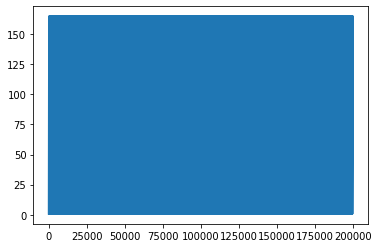

In [254]:
plt.plot(losses)

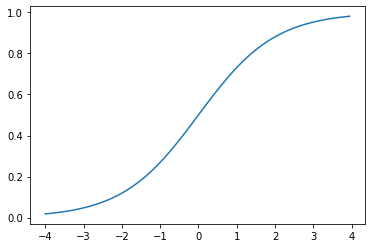

In [241]:
ys = nn.activation(np.arange(-4,4,.05))
plt.plot( np.arange(-4,4,.05), ys)